<a href="https://www.kaggle.com/code/mfaisall11/walmart-sales-prediction-using-ml-regressors?scriptVersionId=135600331" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Walmart Sales Prediction Using ML Regressors**

---

## Konten


1. Problem Statement
   * Deskripsi
    * Tujuan
2. Data Understanding
    * Deskripsi Data
    * Import Libraries
    * Load Data
    * Exploratory Data Analysis
3. Data Preparation
    * Transformasi Data
    * Menghapus Outliers
    * Encoding
4. Data Modeling
    * Membagi Data
    * Membuat Model
5. Model Evaluation
    * Performa Model
    * Membandingkan Model
6. Conclusion  

# 1. Problem Statement

## 1.1 Deskripsi
Salah satu toko ritel di Amerika Serikat, Walmart, ingin memprediksi penjualan secara akurat. Kita memiliki data penjualan untuk 45 toko wallmart yang berbeda dan kita mencoba memprediksi penjualan mingguan dari berbagai toko berdasarkan variabel seperti nomor toko, tanggal, suhu, harga bahan bakar, tingkat pengangguran, dll.

## 1.2 Tujuan
Memprediksi weekly sales di perusahaan Walmart


# 2. Data Understanding

## 2.1 Deskripsi Data
Kita akan menggunakan data Walmart.csv untuk mengolah, menganalisa, dan membuat model ML. Data Ini adalah data historis yang mencakup penjualan dari 2010-02-05 hingga 2012-11-01. Data ini memiliki 8 kolom dan keterangan tertentu sebagai berikut:

**Kolom:** <br>
**1. Store** - Toko <br>
**2. Date** - Tanggal dalam rentang 1 minggu<br>
**3. Weekly_Sales** - Penjualan mingguan <br>
**4. Holiday_Flag** - Jika di 1 minggu terdapat hari libur spesial maka bernilai 1, tapi jika 1 minggu tersebut adalah hari libur biasa dan hari tidak libur maka bernilai 0 <br>
**5. Temperature** - Suhu pada hari penjualan <br>
**6. Fuel_Price** - Harga bahan bakar di wilayah tersebut <br>
**7. CPI** - Indeks harga konsumen yang berlaku <br>
**8. Unemployment** - Tingkat pengangguran yang berlaku <br>

**Keterangan:**<br>
**Hari Libur Spesial**: **Super Bowl**: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13\ **Labour Day (Hari Buruh)**: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13\ **Thanksgiving**: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13\ **Christmas (Natal)**: 31-Des-10, 30-Des-11, 28-Des-12, 27-Des-13

## 2.2 Import Libraries
Pertama-pertama, kita perlu mengimpor library yang kita butuhkan untuk mengolah, menganalisa, membuat model dan mengevaluasi model

In [1]:
# Import Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import Berbagai Model Regresi 
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Import Metrik Evaluasinya
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

## 2.3 Load Data
Lalu kita memasukkan data Walmart.csv ke variabel yang bernama df untuk mempermudah proses pengolahan data dan menampilkan 5 isi data teratasnya

In [2]:
df = pd.read_csv(r'/kaggle/input/walmart-dataset/Walmart.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


## 2.4 Exploratory Data Analysis
Kemudian kita akan melakukan exploratory data analysis yang bertujuan untuk memahami karakteristik dan pola dalam dataset secara visual dan deskriptif

In [3]:
# Mengecek baris dan kolom pada data
df.shape

(6435, 8)

In [4]:
# Melihat informasi pada dataset Walmart.csv
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
# Menganalisa statistik pada data 
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [6]:
# Mengecek apakah ada nilai null pada setiap kolom?
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [7]:
# Mengkonversi kolom Date menjadi format datetime bertipe data int dan kita tampung ke kolom baru yang bernama weekday,month,year
df['Date'] = pd.to_datetime(df['Date'])
df['weekday'] = df['Date'].dt.weekday
df['month'] = df['Date'].dt.month
df['year']  = df['Date'].dt.year
df.drop('Date',axis=1,inplace=True)

/tmp/ipykernel_20/2798875113.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


In [8]:
# Melakukan konversi tipe data pada kolom weekday dan month dari int ke object untuk dianalisa
weekdays = {0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thrusday',5:'Friday',6:'Saturday'}
df['weekday'] = df['weekday'].map(weekdays)

months = {1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}
df['month'] = df['month'].map(months)


In [9]:
# Mengecek nilai unik setiap kolom
df.nunique().sort_values()

Holiday_Flag       2
year               3
weekday            7
month             12
Store             45
Unemployment     349
Fuel_Price       892
CPI             2145
Temperature     3528
Weekly_Sales    6435
dtype: int64

Text(0.5, 1.0, 'Penjualan Berdasarkan Tahun 2010-2012')

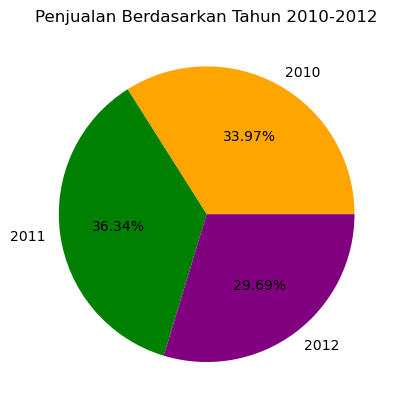

In [10]:
plt.pie(df.groupby('year')['Weekly_Sales'].sum(),
        labels=df['year'].unique(),
        normalize=True,
        autopct='%1.2f%%',
        colors=['orange', 'green', 'purple'])
plt.title('Penjualan Berdasarkan Tahun 2010-2012')

# Menghitung penjualan per tahun berdasarkan penjualan mingguan
# df.groupby('year')['Weekly_Sales'].sum().reset_index()

Tahun 2011 mencatat jumlah penjualan tertinggi, diikuti oleh tahun 2010 dan 2012.

In [11]:
df2 = df.groupby('weekday')['Weekly_Sales'].sum().reset_index()
df2.head(10)

,weekday,Weekly_Sales
0,Friday,2.824947e+08
1,Monday,4.335075e+08
2,Saturday,4.266091e+08
3,Sunday,5.390133e+08
4,Thrusday,4.486257e+09
5,Tuesday,9.271282e+07
6,Wednesday,4.766244e+08


Text(0.5, 1.0, 'Penjualan Berdasarkan Harian')

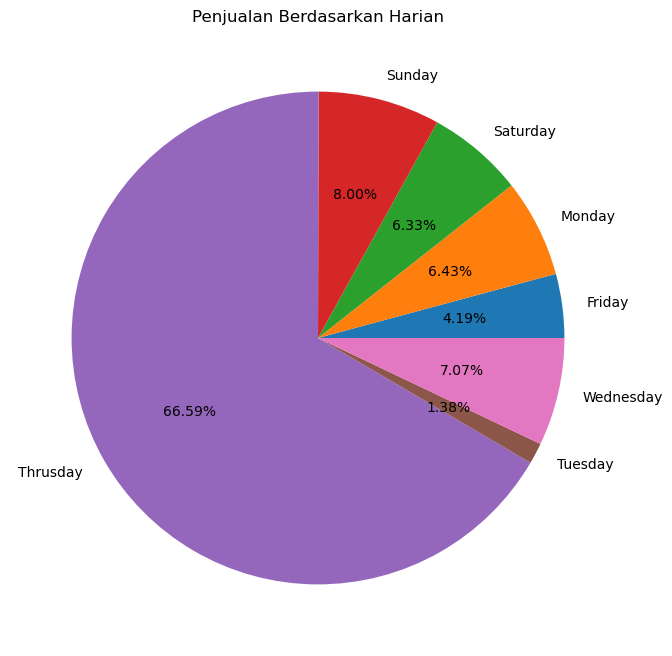

In [12]:
plt.figure(figsize=(10,8))
plt.pie(df2['Weekly_Sales'],
        labels= df2['weekday'],
        autopct='%1.2f%%', 
        normalize=True)
plt.title('Penjualan Berdasarkan Harian')

In [13]:
df.groupby('weekday')['Weekly_Sales'].sum().sort_values().reset_index()

,weekday,Weekly_Sales
0,Tuesday,9.271282e+07
1,Friday,2.824947e+08
2,Saturday,4.266091e+08
3,Monday,4.335075e+08
4,Wednesday,4.766244e+08
5,Sunday,5.390133e+08
6,Thrusday,4.486257e+09


66,59% penjualan terjadi pada hari Kamis.

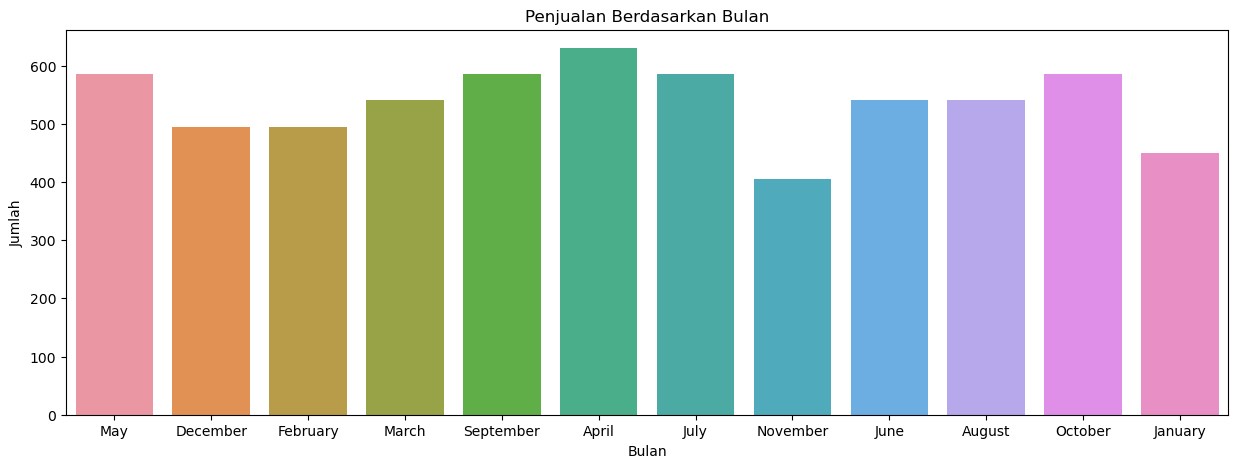

In [14]:
#Penjualan berdasarkan bulan
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='month')
# Memberikan label sumbu x dan y
plt.xlabel('Bulan')
plt.ylabel('Jumlah')

# Memberikan judul plot
plt.title('Penjualan Berdasarkan Bulan')

# Menampilkan plot
plt.show()
# df['month'].value_counts()

Penjualan tertinggi tercatat pada bulan April kemudian diikuti oleh bulan Mei, October, December, July.

In [15]:
df3 = df.groupby('month')['Weekly_Sales'].sum().sort_values().reset_index()
df3

,month,Weekly_Sales
0,January,4.264263e+08
1,November,4.591693e+08
2,February,5.220257e+08
3,March,5.534864e+08
4,August,5.642317e+08
5,June,5.750180e+08
6,September,5.905323e+08
7,July,5.933139e+08
8,December,5.990761e+08
9,October,6.029189e+08


([<matplotlib.patches.Wedge at 0x7b7416036350>,
 [Text(-0.25679386593526243, -1.0696059603508306, 'Hari libur biasa dan Hari tidak libur'),
  Text(0.3268284610531304, 1.361316699760068, 'Hari libur spesial')],
 [Text(-0.14006938141923403, -0.5834214329186348, '92.50%'),
  Text(0.2101040106770124, 0.8751321641314721, '7.50%')])

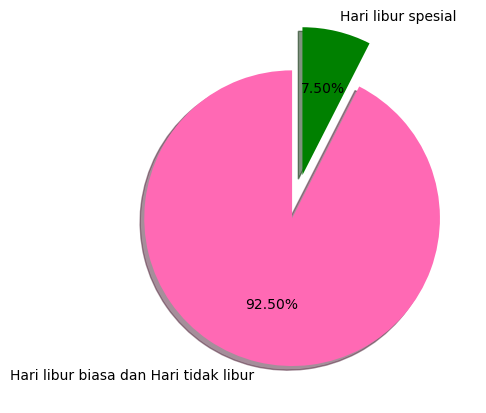

In [16]:
df4 = df.groupby('Holiday_Flag')['Weekly_Sales'].sum().reset_index()
plt.pie(df4['Weekly_Sales'],
        labels= ['Hari libur biasa dan Hari tidak libur','Hari libur spesial'],
        normalize=True,
        autopct='%1.2f%%',
        startangle=90,
        explode=[0,0.3],
        shadow=True,
        colors=['hotpink','green'])

Sebagian besar penjualan terjadi pada hari libur biasa dan hari tidak libur

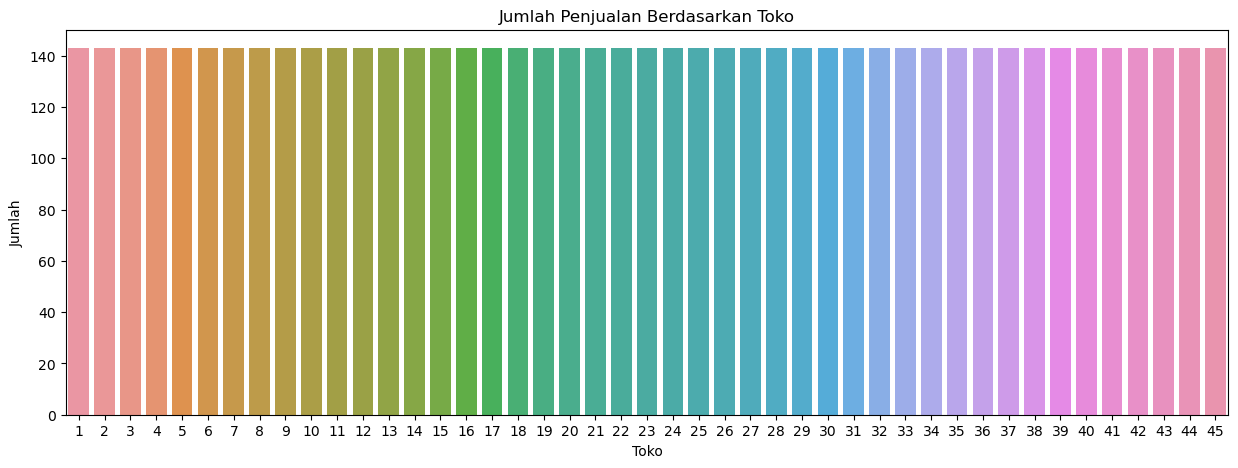

In [17]:
#Penjualan Berdasarkan Toko
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='Store')
# Memberikan label sumbu x dan y
plt.xlabel('Toko')
plt.ylabel('Jumlah')

# Memberikan judul plot
plt.title('Jumlah Penjualan Berdasarkan Toko')

# Menampilkan plot
plt.show()

Semua toko memiliki jumlah penjualan yang sama

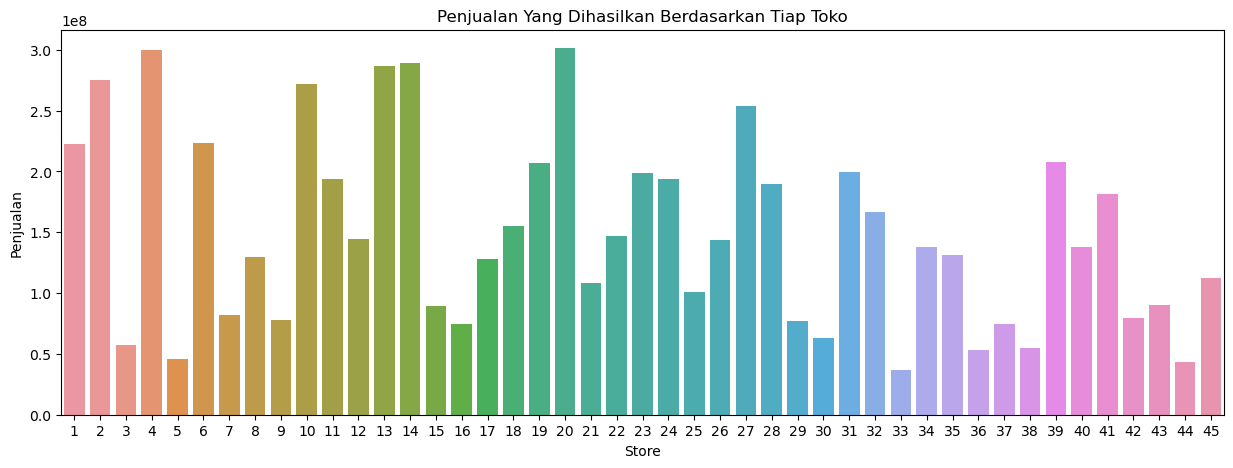

In [18]:
df4 = df.groupby('Store')['Weekly_Sales'].sum().reset_index()

plt.figure(figsize=(15,5))
sns.barplot(x='Store', y='Weekly_Sales', data=df4)

# Menambahkan judul dan label sumbu
plt.title('Penjualan Yang Dihasilkan Berdasarkan Tiap Toko')
plt.xlabel('Store')
plt.ylabel('Penjualan')

# Menampilkan chart
plt.show()
# df.groupby('Store')['Weekly_Sales'].sum().reset_index()

Toko ke-20 mencatat penjualan tertinggi.

/tmp/ipykernel_20/2101116331.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weekly_Sales'],kde=True)


Text(0.5, 1.0, 'Distribusi Weekly Sales')

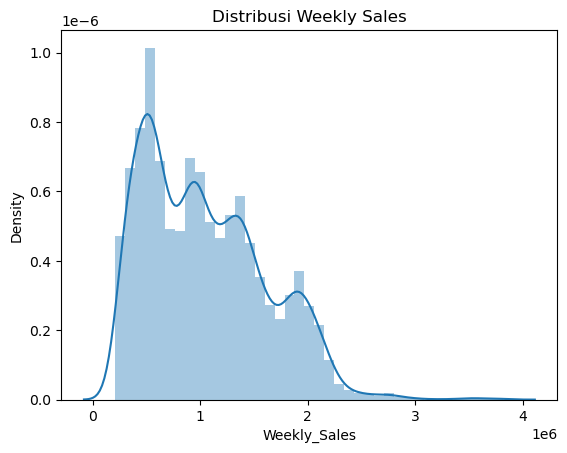

In [19]:
# Visualisasi distribusi weekly sales
sns.distplot(df['Weekly_Sales'],kde=True)
plt.title('Distribusi Weekly Sales')

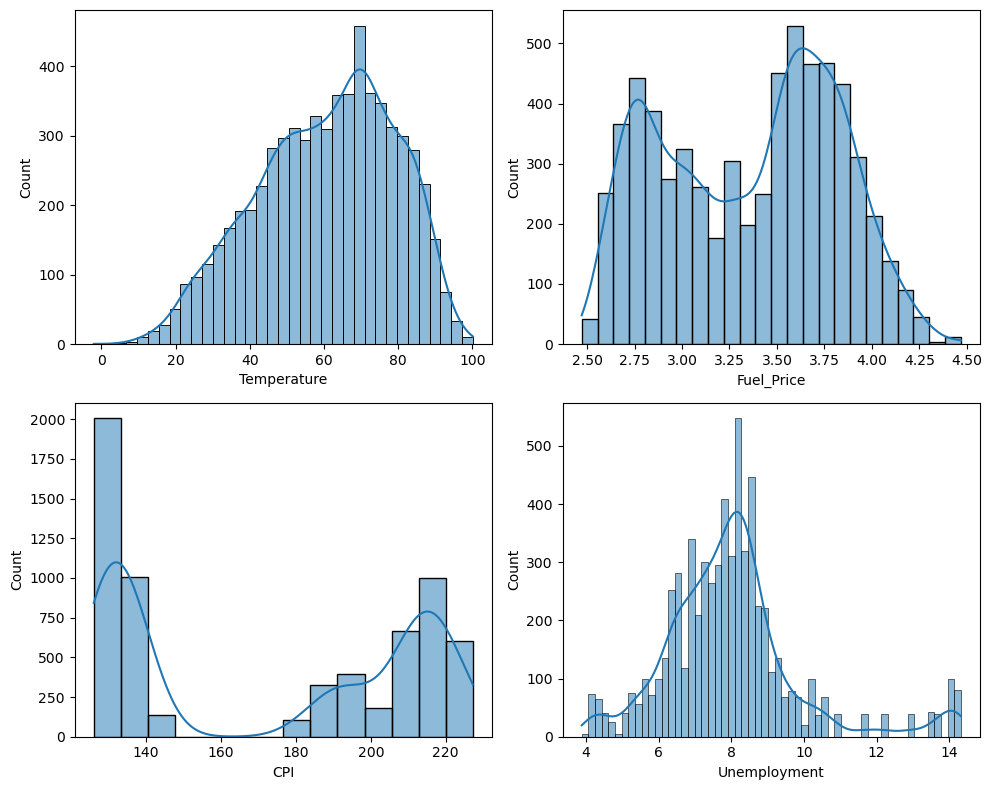

In [20]:
# Visualisasi distribusi kolom temperature, fuel price, cpi dan unemployment
columns = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

# Mengatur ukuran frame
plt.figure(figsize=(10, 8))

# Melakukan iterasi untuk setiap kolom
for i, column in enumerate(columns):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[column], kde=True)

plt.tight_layout()
plt.show()

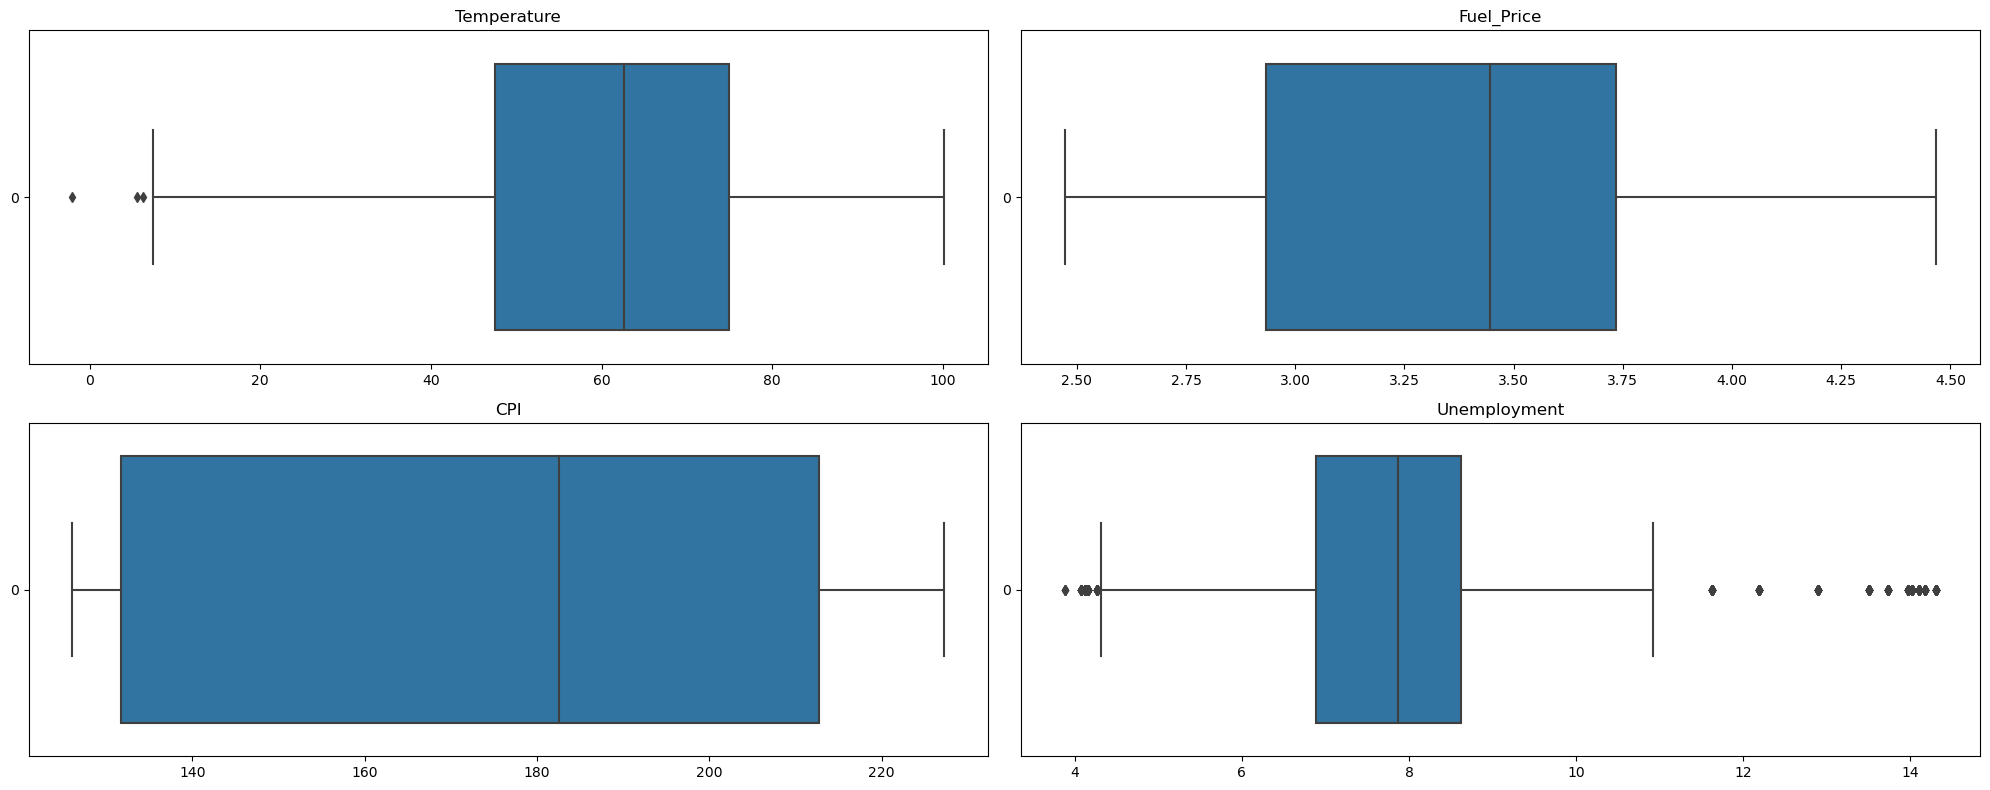

In [21]:
# Visualisasi box-plot kolom temperature, fuel price, cpi dan unemployment
columns = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

# Mengatur ukuran frame
plt.figure(figsize=(20, 8))

# Melakukan iterasi untuk setiap kolom
for i, column in enumerate(columns):
    plt.subplot(2, 2, i+1)
    sns.boxplot(df[column], orient='h')
    plt.title(column)

plt.tight_layout()
plt.show()

/tmp/ipykernel_20/364496422.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


Text(0.5, 1.0, 'Correlation Matrix')

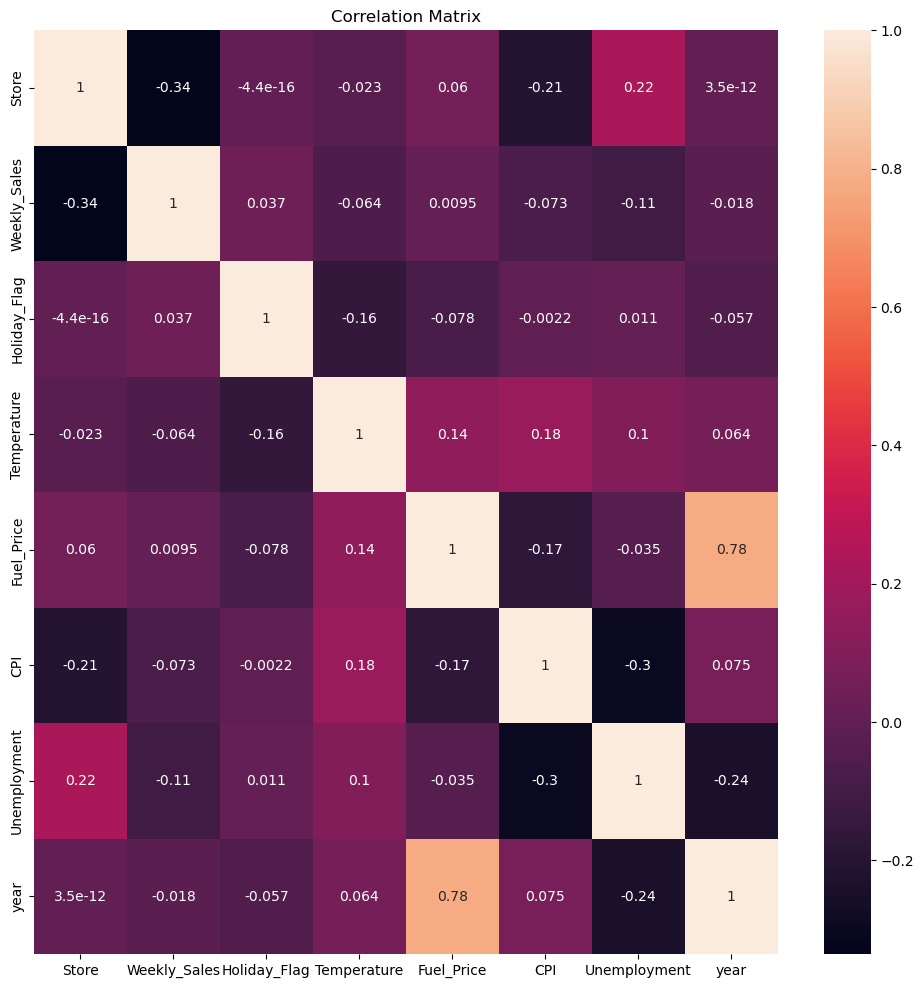

In [22]:
# Melihat hubungan antar kolom
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation Matrix')

# 3. Data Preparation

## 3.1 Transformasi Data
Disini kita akan mentransformasikan data kolom Temperature, Fuel_Price, CPI dan Unemployment

In [23]:
# Transformasi data menggunakan PowerTransformer
cols =['Temperature','Fuel_Price','CPI','Unemployment']
df_numeric = df[cols]
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(standardize=True)
df_transformed = pd.DataFrame(pt.fit_transform(df_numeric),columns=cols)

for col in cols:
    df[col] = df_transformed[col]
    
    
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year
0,1,1643690.90,0,-1.017966,-1.683544,1.006528,0.185804,Saturday,May,2010
1,1,1641957.44,1,-1.204376,-1.732738,1.009450,0.185804,Wednesday,December,2010
2,1,1611968.17,0,-1.135341,-1.802251,1.010391,0.185804,Thrusday,February,2010
3,1,1409727.59,0,-0.799809,-1.706104,1.011002,0.185804,Thrusday,February,2010
4,1,1554806.68,0,-0.806467,-1.574543,1.011613,0.185804,Sunday,May,2010


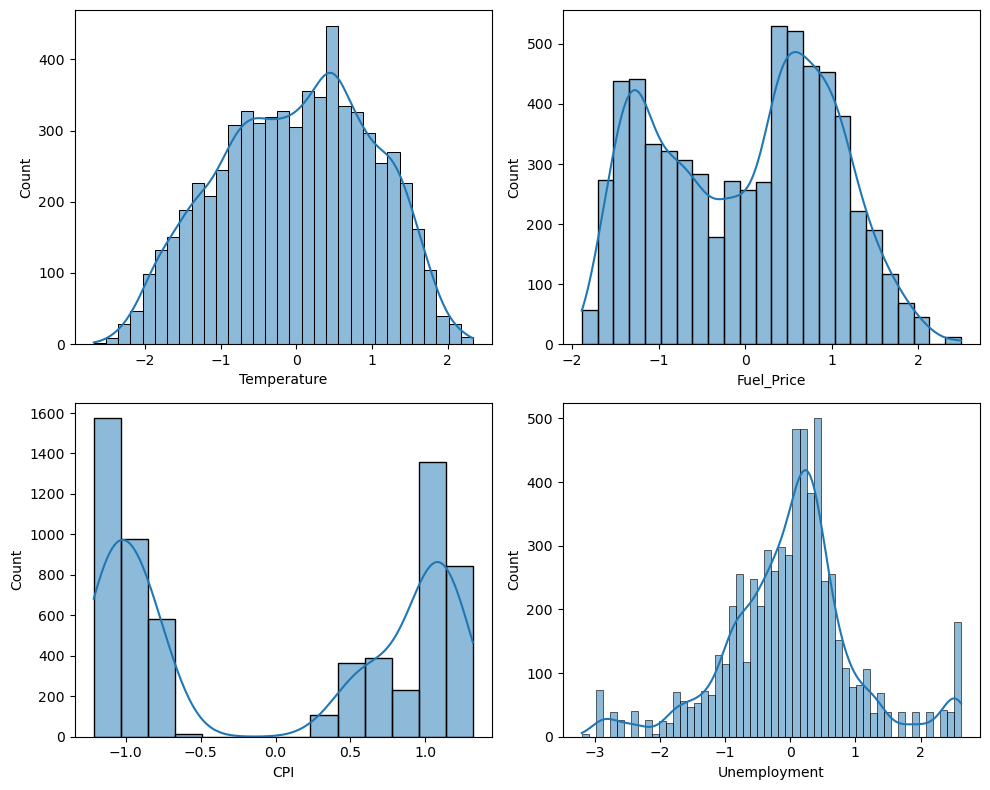

In [24]:
# Visualisasi distribusi kolom temperature, fuel price, cpi dan unemployment setelah ditransformasi menggunakan power transformer
columns = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

# Mengatur ukuran frame
plt.figure(figsize=(10, 8))

# Melakukan iterasi untuk setiap kolom
for i, column in enumerate(columns):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[column], kde=True)

plt.tight_layout()
plt.show()

## 3.2 Menghapus Outliers


In [25]:
# Menghapus outliers pada kolom unemployment
Q1 = df['Unemployment'].quantile(0.25)
Q3 = df['Unemployment'].quantile(0.75)
IQR = Q3-Q1

df = df[df['Unemployment'] >= Q1-1.5*(IQR)]
df = df[df['Unemployment'] <= Q3+1.5*(IQR)]
df.shape

(5922, 10)

In [26]:
# Menghapus outliers pada kolom temperature
Q1 = df['Temperature'].quantile(0.25)
Q3 = df['Temperature'].quantile(0.75)
IQR = Q3-Q1

df = df[df['Temperature'] >= Q1-1.5*(IQR)]

df = df[df['Temperature'] <= Q3+1.5*(IQR)]
df.shape

(5922, 10)

## 3.3 Encoding

In [27]:
# Melakukan Encoding Pada Kolom Weekdays - Value diberi sesuai tingkat penjualan 
wk = {'Sunday':5,
      'Monday':3, 
      'Tuesday':0, 
      'Wednesday':4, 
      'Thrusday':6, 
      'Friday':1, 
      'Saturday':2 }
df['weekday'] = df['weekday'].map(wk)

In [28]:
# Melakukan Encoding Pada Kolom Year - Value diberi sesuai tingkat penjualan 
yr = {2010:1,
      2011:2, 
      2012:0}
df['year'] = df['year'].map(yr)

In [29]:
# Melakukan Encoding Pada Kolom Month - Value diberi sesuai tingkat penjualan 
mnth = {'January':1,
        'February':3,
        'March':4, 
        'April':12, 
        'May':11, 
        'June':6, 
        'July':8, 
        'August':5, 
        'September':7, 
        'October':10, 
        'November':2, 
        'December':9}
df['month'] = df['month'].map(mnth)

# 4. Data Modeling

## 4.1 Pembagian Data

In [30]:
# Membagi data menjadi fitur (X) dan target (y)
X = df.drop(['Weekly_Sales'],axis=1)
Y = df['Weekly_Sales']

In [31]:
# Membagi data menjadi data latih dan data uji
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [32]:
# Mengecek proporsi X train, X test, Y train dan Y test
print('Jumlah baris dan kolom dari x_train adalah:', X_train.shape,', sedangkan Jumlah baris dan kolom dari y_train adalah:', Y_train.shape)
print('Jumlah baris dan kolom dari x_test adalah:', X_test.shape,', sedangkan Jumlah baris dan kolom dari y_test adalah:', Y_test.shape)

Jumlah baris dan kolom dari x_train adalah: (4737, 9) , sedangkan Jumlah baris dan kolom dari y_train adalah: (4737,)
Jumlah baris dan kolom dari x_test adalah: (1185, 9) , sedangkan Jumlah baris dan kolom dari y_test adalah: (1185,)


In [33]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
transformer = ColumnTransformer(transformers=[('tf',OneHotEncoder(sparse=False),['Store'])],remainder='passthrough')

In [34]:
X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [35]:
# Mengambil hasil transformasi OneHotEncoder
one_hot_encoded = transformer.named_transformers_['tf'].get_feature_names_out(['Store'])

# Membuat dataframe dari hasil transformasi
X_train_encoded_df = pd.DataFrame(X_train, columns=list(one_hot_encoded) + list(transformer.transformers_[1][2]))

# Menampilkan statistik setelah transformasi
X_train_encoded_df.head()

,Store_1,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,Store_10,...,Store_44,Store_45,1,2,3,4,5,6,7,8
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.106780,-0.044071,1.226720,-1.328937,6.0,6.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.945462,-1.630134,-1.200268,0.459985,2.0,11.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.075933,2.051854,-1.046745,-0.232813,6.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.198460,0.617344,-0.687236,0.258170,4.0,6.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.004192,0.395344,1.094140,0.043846,6.0,7.0,2.0


In [36]:
# df.describe()

## 4.2 Membuat Model

In [37]:
def pred_model(model,X_train,Y_train,X_test,Y_test):
    c = model()
    c.fit(X_train,Y_train)
    y_train_pred = c.predict(X_train)
    y_test_pred = c.predict(X_test)
    print(model)
    print('Coeffecient: ',c.coef_)
    print('Intercept:',c.intercept_)
    print(f'MSE Testing: {mean_squared_error(Y_test,y_test_pred)}')
    print(f'MSE Training: {mean_squared_error(Y_train,y_train_pred)}\n') 
    print(f'MAE Testing: {mean_absolute_error(Y_test,y_test_pred)}')
    print(f'MAE Training: {mean_absolute_error(Y_train,y_train_pred)}\n')
    print(f'R2 Testing : {r2_score(Y_test,y_test_pred)}')
    print(f'R2 Training : {r2_score(Y_train,y_train_pred)}\n')
    print(f'RMSE Testing:{np.sqrt(mean_squared_error(Y_test,y_test_pred))}')
    print(f'RMSE Training:{np.sqrt(mean_squared_error(Y_train,y_train_pred))}')

    # Ploting Y train dengan y train pred
    plt.figure(figsize=[15,4])

    plt.subplot(1,2,2)
    plt.scatter(Y_train,y_train_pred)
    plt.plot([Y_train.min(),Y_train.max()],[Y_train.min(),Y_train.max()], 'r--')
    plt.title('Perbandingan Y train (Nilai sebenarnya) dengan y train pred (Hasil prediksi)')         
    plt.xlabel('Y_train')                       
    plt.ylabel('y_train_pred')                       
    plt.show()

    # Ploting Y test dengan y test pred
    plt.figure(figsize=[15,4])

    plt.subplot(1,2,2)
    plt.scatter(Y_test,y_test_pred)
    plt.plot([Y_test.min(),Y_test.max()],[Y_test.min(),Y_test.max()], 'r--')
    plt.title('Perbandingan Y test (Nilai sebenarnya) dengan y test pred (Hasil prediksi)')         
    plt.xlabel('Y_test')                       
    plt.ylabel('y_test_pred')                       
    plt.show()

# 5. Model Evaluation

## 5.1 Performa Model

<class 'sklearn.linear_model._base.LinearRegression'>
Coeffecient:  [-3.19983649e+04  3.39268792e+05 -1.23125676e+06  1.50374580e+06
 -1.32428083e+06 -5.91130682e+04 -7.93159233e+05 -7.70363931e+05
 -1.14368201e+06  1.44608051e+06 -2.75204515e+05  6.55107692e+05
  1.46388590e+06  7.76285385e+05  3.79337614e+04 -9.07156154e+05
  3.26846394e+05  4.98802338e+05  8.55682259e+05  5.91447059e+05
 -8.22864254e+05  3.73606141e+05  6.42443994e+05  7.78790824e+05
 -8.25411371e+05  3.86194452e+05  1.13179485e+06  9.46844828e+05
 -1.27647805e+04 -1.14849987e+06 -1.97155545e+05 -1.83818044e+05
 -1.95091419e+05  5.01052035e+05  2.83436706e+05 -1.19842143e+06
 -1.05064271e+06  9.27677873e+04 -1.07718973e+05  2.29682378e+05
 -1.39241388e+05  9.49523803e+04 -8.09394954e+05 -2.58201011e+05
 -4.71211639e+05  5.90873615e+04 -1.51264078e+04 -4.51761317e+04
  4.80334736e+05 -5.45027596e+04  3.16865717e+02  3.67639888e+03
  3.01727017e+04]
Intercept: 986228.1161471341
MSE Testing: 21646237040.8387
MSE Traini

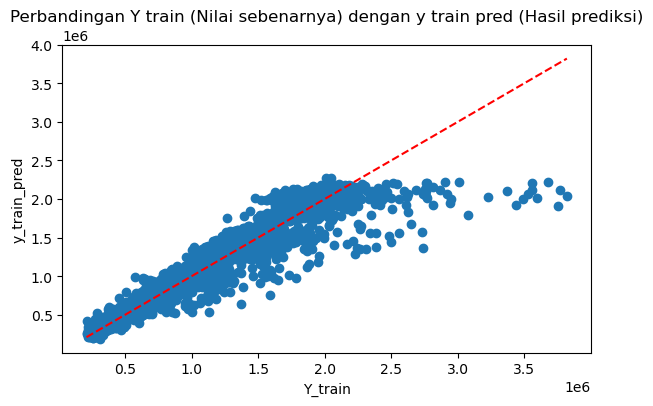

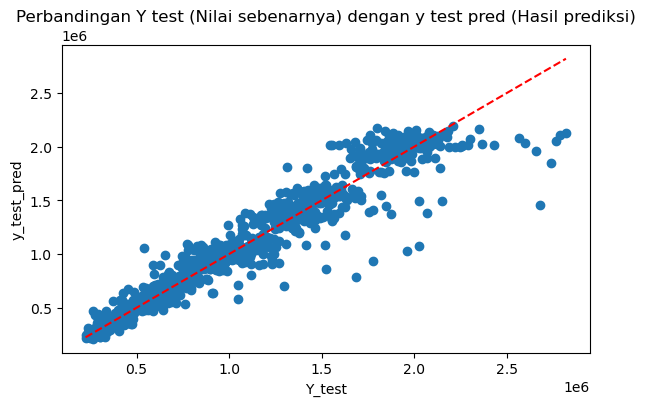

In [38]:
pred_model(LinearRegression, X_train, Y_train, X_test, Y_test)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.870e+13, tolerance: 1.551e+11
  model = cd_fast.enet_coordinate_descent(


<class 'sklearn.linear_model._coordinate_descent.Lasso'>
Coeffecient:  [ 2.55101896e+05  6.24751810e+05 -9.34802554e+05  1.37707038e+06
 -1.04398463e+06  2.26938265e+05 -5.86508720e+05 -4.81837897e+05
 -8.54084350e+05  1.32260388e+06  2.10817421e+04  5.43077248e+05
  1.33809079e+06  9.49626215e+05 -4.85675341e+04 -7.13035831e+05
  1.98233644e+05  4.19117489e+05  7.68410213e+05  8.47544351e+05
 -5.37298157e+05  3.12735244e+05  5.36655801e+05  6.94287454e+05
 -5.69742644e+05  3.01369813e+05  1.06735141e+06  8.34707226e+05
 -8.78487415e+04 -8.63133108e+05  8.82009086e+04  2.31128731e+04
 -3.17326273e+05  3.92920148e+05  2.27434295e+05 -9.14478665e+05
 -7.66708616e+05 -1.89697849e+04  1.75836834e+05  1.23684322e+05
  5.83009381e+04 -2.82924829e+04 -5.41579532e+05 -3.85638544e+05
 -2.98094084e+05  6.15316293e+04 -1.55691636e+04 -3.53852485e+04
  2.97836591e+05 -6.44269070e+04  4.78018814e+02  3.42900109e+03
  2.48277473e+04]
Intercept: 909236.813673577
MSE Testing: 21505656322.60002
MSE Tra

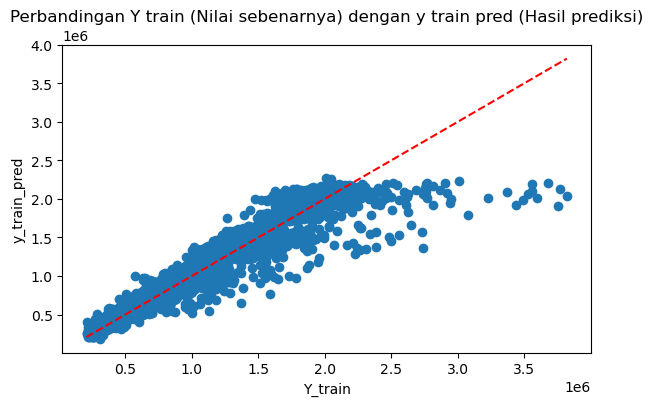

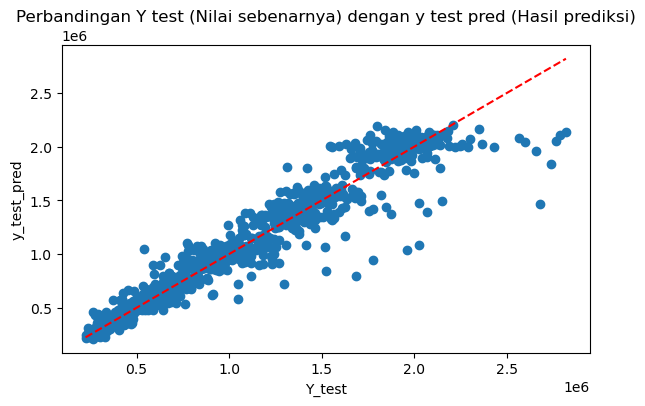

In [39]:
pred_model(Lasso, X_train, Y_train, X_test, Y_test)

<class 'sklearn.linear_model._ridge.Ridge'>
Coeffecient:  [ 5.08945380e+05  8.72785810e+05 -6.54154884e+05  9.34807124e+05
 -7.87651099e+05  4.81037595e+05 -4.60590927e+05 -2.16389835e+05
 -5.83134907e+05  8.86064422e+05  2.93184893e+05  1.24862752e+05
  9.00031445e+05  1.00746605e+06 -4.12159133e+05 -6.03243505e+05
 -2.33972730e+05  6.20907581e+04  3.96811318e+05  1.04518842e+06
 -2.79042683e+05 -1.10220915e+04  1.40998311e+05  3.27413663e+05
 -3.60685723e+05 -6.17332620e+04  7.31222349e+05  4.08783621e+05
 -4.34183646e+05 -6.02308140e+05  3.40936321e+05  1.44936719e+05
 -7.38093074e+05 -1.19827899e+04 -8.84398199e+04 -6.55872423e+05
 -5.09957671e+05 -4.20108930e+05  4.24514704e+05 -2.64010306e+05
  1.66832606e+05 -4.53135827e+05 -3.15706050e+05 -8.11227133e+05
 -2.30107667e+05  6.54421601e+04 -1.64762998e+04 -1.82643930e+04
 -7.42522130e+03 -7.82382453e+04  7.47999753e+02  2.99621407e+03
  1.55978869e+04]
Intercept: 1002794.7350484981
MSE Testing: 21325689239.276905
MSE Training: 265

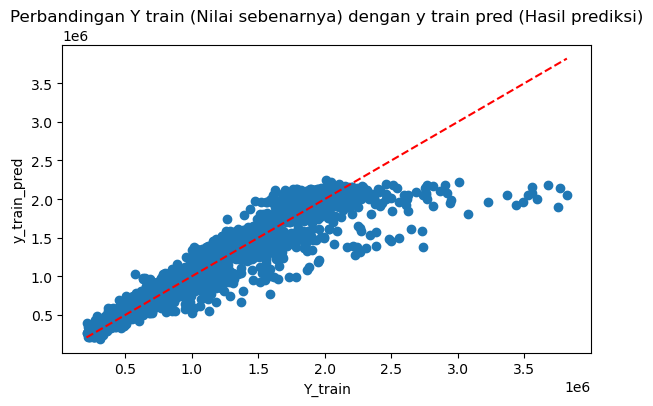

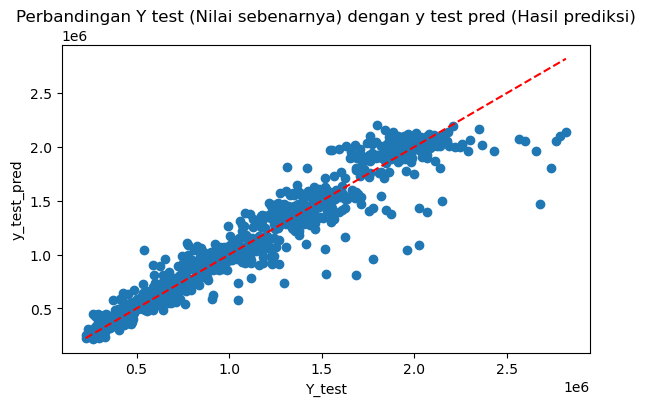

In [40]:
pred_model(Ridge, X_train, Y_train, X_test, Y_test)

<class 'sklearn.linear_model._coordinate_descent.ElasticNet'>
Coeffecient:  [ 24076.58092717  41250.54790707 -26849.37014628  31511.70662846
 -32315.21094527  24106.64730211 -23638.19010885  -5572.97679539
 -20720.25923101  39640.71334331  15859.38970031   -220.59400572
  42275.89864861  46429.07488074 -21516.74691884 -26721.38496273
  -9814.42571027    362.84237005  17070.41771848  50124.55807031
 -11312.15281491  -1665.55582275   5084.04437595  13461.88134674
 -14969.28564488  -3890.61123226  33784.04688998   4107.9827397
 -23200.1530114  -25742.90687808  17877.75153541   6864.78639983
 -36667.52426545  -4180.57405193  -5996.73355347 -28497.34135807
 -24716.06546874  -7496.21272691  21503.79169013  -3391.63956548
  10642.51037836 -23627.90924535 -14962.53288757 -36803.78509139
 -11538.03045047   7412.30452124 -19641.13986572   1307.30033735
 -25130.16259641 -19491.21981139   -209.22037431   2049.95302859
  12893.37304988]
Intercept: 1020399.1906641511
MSE Testing: 280708819287.2801
M

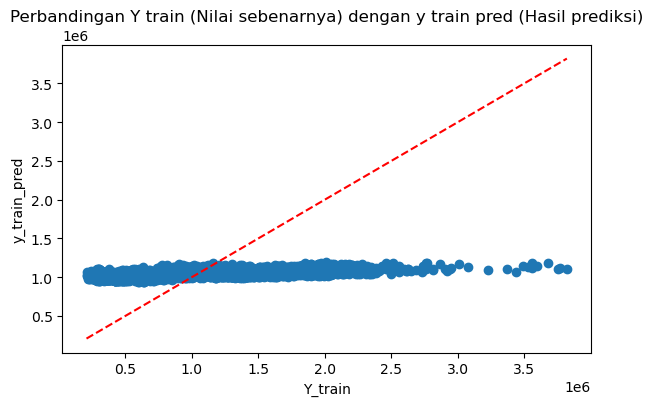

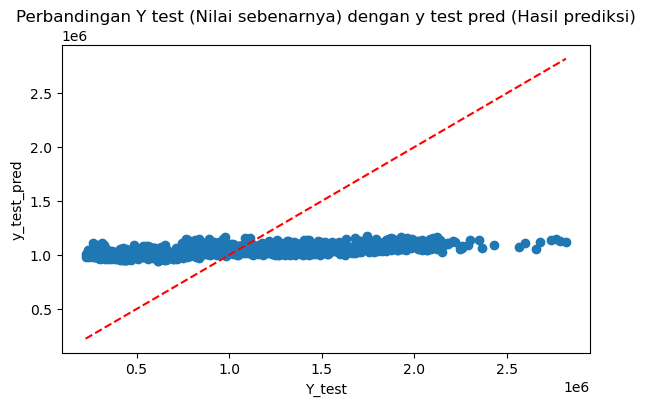

In [41]:
pred_model(ElasticNet, X_train, Y_train, X_test, Y_test)

## 5.2 Membandingkan Model

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.870e+13, tolerance: 1.551e+11
  model = cd_fast.enet_coordinate_descent(


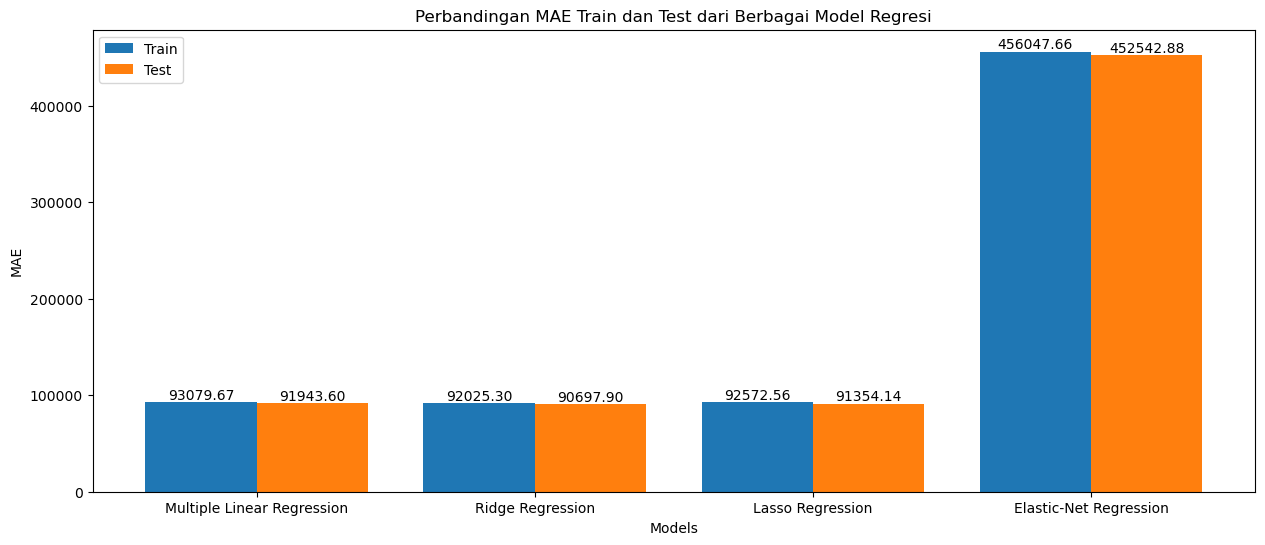

In [42]:
def evaluate_models(models_mae, X_train, Y_train, X_test, Y_test):
    mae_scores_train = {}
    mae_scores_test = {}

    # Menghitung MAE untuk setiap model
    for model_name, model in models_mae.items():
        model.fit(X_train, Y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        mae_train = mean_absolute_error(Y_train, y_train_pred)
        mae_test = mean_absolute_error(Y_test, y_test_pred)
        mae_scores_train[model_name] = mae_train
        mae_scores_test[model_name] = mae_test
    
    # Ploting Skor MAE
    plt.figure(figsize=(15, 6))
    bar_width = 0.40
    index = np.arange(len(mae_scores_train))
    
    plt.bar(index, mae_scores_train.values(), bar_width, label='Train')
    plt.bar(index + bar_width, mae_scores_test.values(), bar_width, label='Test')
    
    plt.xlabel('Models')
    plt.ylabel('MAE')
    plt.title('Perbandingan MAE Train dan Test dari Berbagai Model Regresi')
    plt.xticks(index + bar_width / 2, mae_scores_train.keys())
    plt.legend()
    
    # Menambahkan nilai MAE di atas bar
    for i, v in enumerate(mae_scores_train.values()):
        plt.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom')
    
    for i, v in enumerate(mae_scores_test.values()):
        plt.text(i + bar_width, v + 0.01, f'{v:.2f}', ha='center', va='bottom')
    
    plt.show()

# Membuat objek model
models_mae = {'Multiple Linear Regression': LinearRegression(),
               'Ridge Regression': Ridge(),
               'Lasso Regression': Lasso(),
               'Elastic-Net Regression': ElasticNet()}

# Memanggil fungsi untuk evaluasi dan visualisasi
evaluate_models(models_mae, X_train, Y_train, X_test, Y_test)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.870e+13, tolerance: 1.551e+11
  model = cd_fast.enet_coordinate_descent(


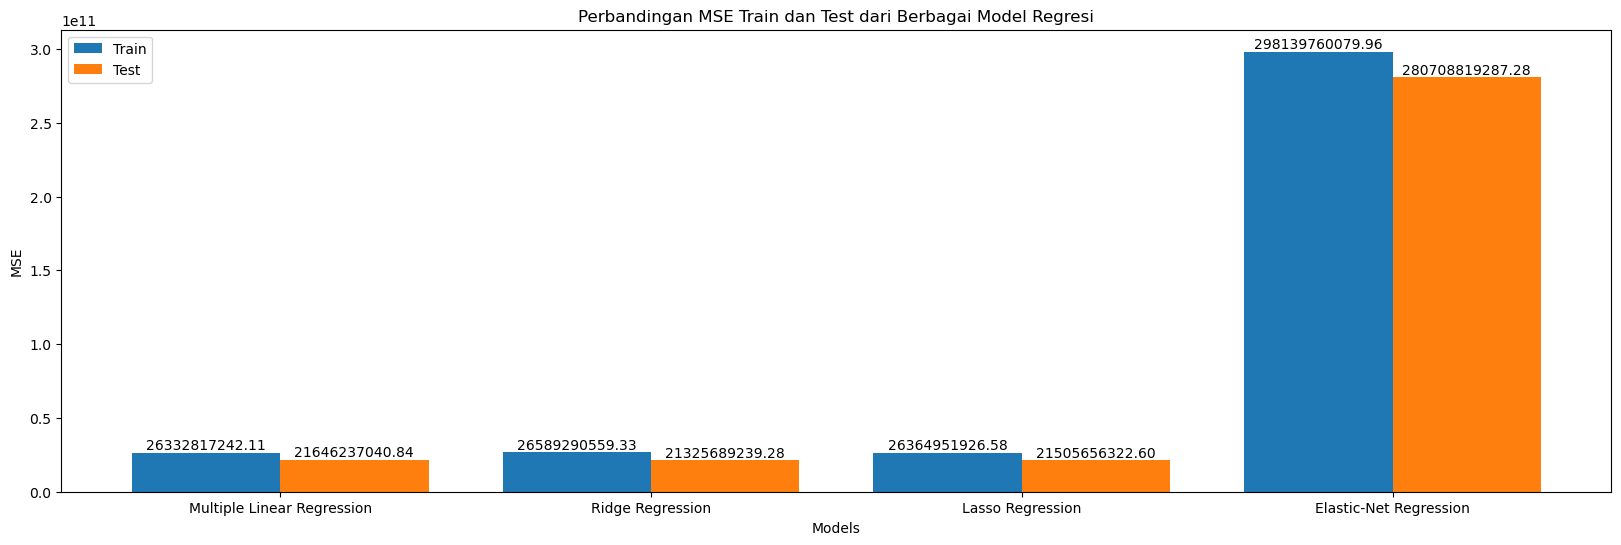

In [43]:
def evaluate_models(models_mse, X_train, Y_train, X_test, Y_test):
    mse_scores_train = {}
    mse_scores_test = {}

    # Menghitung MSE untuk setiap model
    for model_name, model in models_mse.items():
        model.fit(X_train, Y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        mse_train = mean_squared_error(Y_train, y_train_pred)
        mse_test = mean_squared_error(Y_test, y_test_pred)
        mse_scores_train[model_name] = mse_train
        mse_scores_test[model_name] = mse_test
    
    # Ploting Skor MSE
    plt.figure(figsize=(20, 6))
    bar_width = 0.40
    index = np.arange(len(mse_scores_train))
    
    plt.bar(index, mse_scores_train.values(), bar_width, label='Train')
    plt.bar(index + bar_width, mse_scores_test.values(), bar_width, label='Test')
    
    plt.xlabel('Models')
    plt.ylabel('MSE')
    plt.title('Perbandingan MSE Train dan Test dari Berbagai Model Regresi')
    plt.xticks(index + bar_width / 2, mse_scores_train.keys())
    plt.legend()
    
    # Menambahkan nilai MSE di atas bar
    for i, v in enumerate(mse_scores_train.values()):
        plt.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom')
    
    for i, v in enumerate(mse_scores_test.values()):
        plt.text(i + bar_width, v + 0.01, f'{v:.2f}', ha='center', va='bottom')
    
    plt.show()

# Membuat objek model
models_mse = {'Multiple Linear Regression': LinearRegression(),
               'Ridge Regression': Ridge(),
               'Lasso Regression': Lasso(),
               'Elastic-Net Regression': ElasticNet()}

# Memanggil fungsi untuk evaluasi dan visualisasi
evaluate_models(models_mse, X_train, Y_train, X_test, Y_test)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.870e+13, tolerance: 1.551e+11
  model = cd_fast.enet_coordinate_descent(


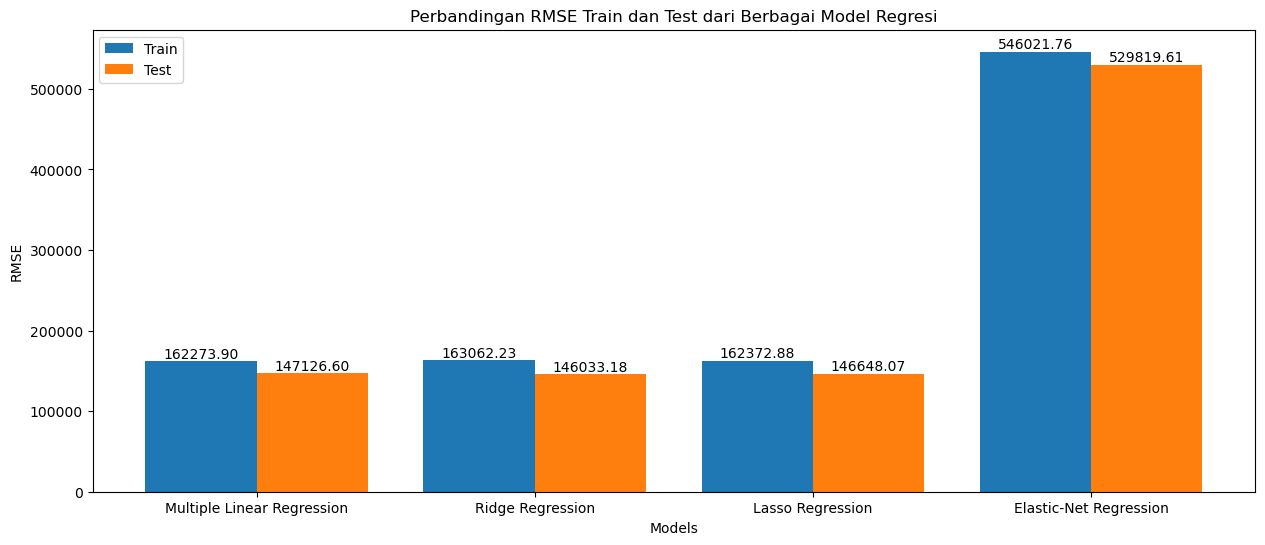

In [44]:
def evaluate_models(models_rmse, X_train, Y_train, X_test, Y_test):
    rmse_scores_train = {}
    rmse_scores_test = {}

    # Menghitung RMSE untuk setiap model
    for model_name, model in models_rmse.items():
        model.fit(X_train, Y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_pred))
        rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_pred))
        rmse_scores_train[model_name] = rmse_train
        rmse_scores_test[model_name] = rmse_test
    
    # Ploting Skor RMSE
    plt.figure(figsize=(15, 6))
    bar_width = 0.40
    index = np.arange(len(rmse_scores_train))
    
    plt.bar(index, rmse_scores_train.values(), bar_width, label='Train')
    plt.bar(index + bar_width, rmse_scores_test.values(), bar_width, label='Test')
    
    plt.xlabel('Models')
    plt.ylabel('RMSE')
    plt.title('Perbandingan RMSE Train dan Test dari Berbagai Model Regresi')
    plt.xticks(index + bar_width / 2, rmse_scores_train.keys())
    plt.legend()
    
    # Menambahkan nilai RMSE di atas bar
    for i, v in enumerate(rmse_scores_train.values()):
        plt.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom')
    
    for i, v in enumerate(rmse_scores_test.values()):
        plt.text(i + bar_width, v + 0.01, f'{v:.2f}', ha='center', va='bottom')
    
    plt.show()

# Membuat objek model
models_rmse = {'Multiple Linear Regression': LinearRegression(),
               'Ridge Regression': Ridge(),
               'Lasso Regression': Lasso(),
               'Elastic-Net Regression': ElasticNet()}

# Memanggil fungsi untuk evaluasi dan visualisasi
evaluate_models(models_rmse, X_train, Y_train, X_test, Y_test)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.870e+13, tolerance: 1.551e+11
  model = cd_fast.enet_coordinate_descent(


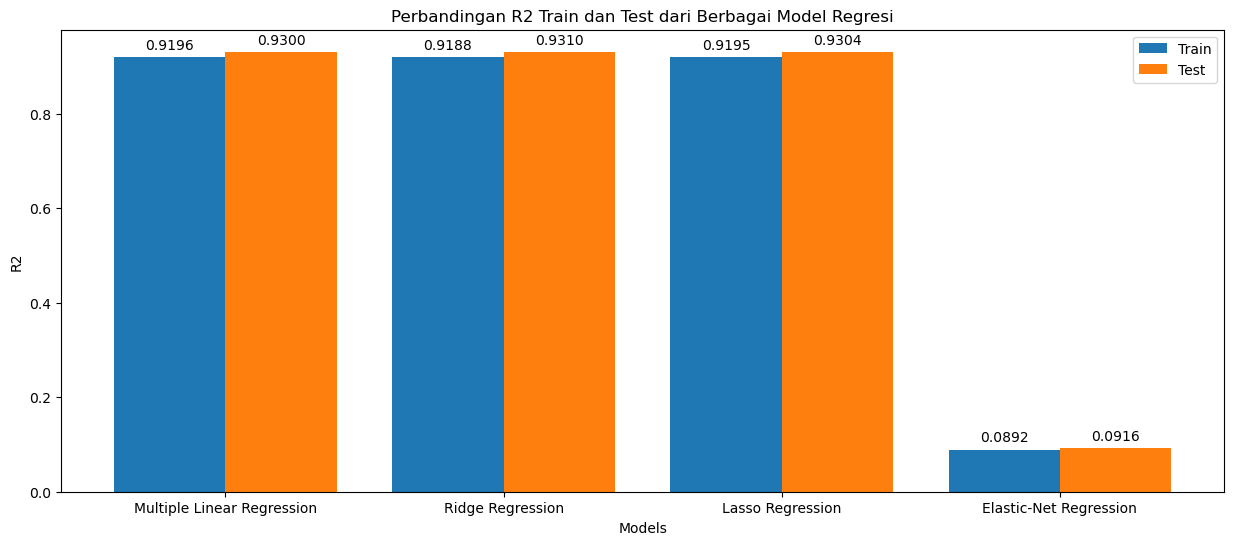

In [45]:
def evaluate_models(models_r2, X_train, Y_train, X_test, Y_test):
    r2_scores_train = {}
    r2_scores_test = {}

    # Menghitung R2 untuk setiap model
    for model_name, model in models_r2.items():
        model.fit(X_train, Y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        r2_train = r2_score(Y_train, y_train_pred)
        r2_test = r2_score(Y_test, y_test_pred)
        r2_scores_train[model_name] = r2_train
        r2_scores_test[model_name] = r2_test
    
    # Ploting Skor R2
    plt.figure(figsize=(15, 6))
    bar_width = 0.40
    index = np.arange(len(r2_scores_train))
    
    plt.bar(index, r2_scores_train.values(), bar_width, label='Train')
    plt.bar(index + bar_width, r2_scores_test.values(), bar_width, label='Test')
    
    plt.xlabel('Models')
    plt.ylabel('R2')
    plt.title('Perbandingan R2 Train dan Test dari Berbagai Model Regresi')
    plt.xticks(index + bar_width / 2, r2_scores_train.keys())
    plt.legend()
    
    # Menambahkan nilai R2 di atas bar
    for i, v in enumerate(r2_scores_train.values()):
        plt.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom')
    
    for i, v in enumerate(r2_scores_test.values()):
        plt.text(i + bar_width, v + 0.01, f'{v:.4f}', ha='center', va='bottom')
    
    plt.show()

# Membuat objek model
models_r2 = {'Multiple Linear Regression': LinearRegression(),
               'Ridge Regression': Ridge(),
               'Lasso Regression': Lasso(),
               'Elastic-Net Regression': ElasticNet()}

# Memanggil fungsi untuk evaluasi dan visualisasi
evaluate_models(models_r2, X_train, Y_train, X_test, Y_test)

Setelah melakukan metrik evaluasi regresi dan membandingkannya pada setiap model, Didapatkan model machine learning multiple linear regresi yang paling terbaik, karena model multipel regresi menghasilkan nilai MSE, RMSE, R2 lebih baik dibandingkan dengan model yang lain meskipun hasil MAE regresi ridge lebih baik dibandingkan dengan model multiple regresi akan tetapi selisih nilainya tidak berbeda jauh.

Menyimpan Hasil Prediksi Weekly Sales Dari Model Terbaik Dalam Format Csv

In [46]:
# Menggunakan model ML multipel linear regresi karena model paling terbaik diantara yang lainnya
model_linier_regresi = LinearRegression()
model_linier_regresi.fit(X_train, Y_train)
y_train_pred = model_linier_regresi.predict(X_train)
y_test_pred = model_linier_regresi.predict(X_test)
print('Coeffecient: ',model_linier_regresi.coef_)
print('Intercept:',model_linier_regresi.intercept_)

Coeffecient:  [-3.19983649e+04  3.39268792e+05 -1.23125676e+06  1.50374580e+06
 -1.32428083e+06 -5.91130682e+04 -7.93159233e+05 -7.70363931e+05
 -1.14368201e+06  1.44608051e+06 -2.75204515e+05  6.55107692e+05
  1.46388590e+06  7.76285385e+05  3.79337614e+04 -9.07156154e+05
  3.26846394e+05  4.98802338e+05  8.55682259e+05  5.91447059e+05
 -8.22864254e+05  3.73606141e+05  6.42443994e+05  7.78790824e+05
 -8.25411371e+05  3.86194452e+05  1.13179485e+06  9.46844828e+05
 -1.27647805e+04 -1.14849987e+06 -1.97155545e+05 -1.83818044e+05
 -1.95091419e+05  5.01052035e+05  2.83436706e+05 -1.19842143e+06
 -1.05064271e+06  9.27677873e+04 -1.07718973e+05  2.29682378e+05
 -1.39241388e+05  9.49523803e+04 -8.09394954e+05 -2.58201011e+05
 -4.71211639e+05  5.90873615e+04 -1.51264078e+04 -4.51761317e+04
  4.80334736e+05 -5.45027596e+04  3.16865717e+02  3.67639888e+03
  3.01727017e+04]
Intercept: 986228.1161471341


In [47]:
# # Menggabungkan y_train dan y_train_pred menjadi DataFrame
# df11 = pd.DataFrame({'Weekly Sales (Y train)': Y_train, 'Weekly Sales (y_train_pred)': y_train_pred})

# # Menyimpan DataFrame ke file CSV
# df11.to_csv('Perbandingan Y Train dengan y train pred Pada Walmart Sales Prediction.csv')

In [48]:
# # Menggabungkan y_train dan y_train_pred menjadi DataFrame
# df10 = pd.DataFrame({'Weekly Sales (Y test)': Y_test, 'Weekly Sales (y_test_pred)': y_test_pred})

# # Menyimpan DataFrame ke file CSV
# df10.to_csv('Perbandingan Y Test dengan y test pred Pada Walmart Sales Prediction.csv')

# 6. Conclusion

1. Dataset ini cukup kecil dengan hanya 6435 sampel dan setelah prapemrosesan, 7,97% dari sampel data dibuang.<br>
2. Menguji beberapa model regresi dengan hyperparameter default memberikan pemahaman tentang kinerja berbagai model pada dataset khusus ini.<br>
3. Model multiple linear regression memiliki kinerja lebih baik dibandingkan model lainnya, karena nilai metrik evaluasinya seperti MSE, RMSE, R2 lebih baik meskipun hasil MAE regresi ridge lebih baik.